#1 - Problema

Estamos atuando numa empresa de telecomunicações ficticia, e nosso chefe quer que, modelemos um algoritmo de machine learning que consiga traçar o perfil da pessoa que vai deixar de ser nosso cliente, ou seja, ele quer que usemos um modelo de classificação, para classificar o perfil do cliente que vai deixar de consumir nosso produtos... O famoso churn.

O seu chefe te disponibilizou uma base de dados que ele julga que tem o necessário para fazer essa classificação, vamos importar ela:


---



---



---



#2 - Analise exploratória dos dados I - Tratamento de variáveis Categóricas

Nossa base é formada por 18 campos, o que são bastantes campos. Para conseguirmos entender de fomra clara cada um deles, separamos eles em variáveis categóricas/Qualitativas e variáveis Quantitativas:

- Categóricas/Qualitativas
  - Maior65Anos --> Booleano mostrando se o cliente é idoso ou não.
  - Conjugue --> Booleano (Sim e Não) que mostra se ele é casado ou nnão.
  - Dependentes --> Booleano (Sim ou Não)
  - Telefone Fixo --> Booleano (Sim ou Não)
  - VariasLinhasTelefonicas --> Categórica, Não se tem apenas uma linha, Sim se tem mais de uma linha e SemServicoTelefonico se não tiver nenhuma linha telefonica.
  - ServicoDeInternet --> Categórica, DLS se tiver internet a cobre, FibraOptica se for de fibra optica e Não se não tiver serviço de internet.
  - SegurancaOnline --> booleana (Sim ou Não).
  - BackupOnline --> booleana (Sim ou Não).
  - SeguroNoDispositivo --> booleana (Sim ou Não).
  - SuporteTecnico --> booleana (Sim ou Não).
  - TVaCabo --> booleana (Sim ou Não).
  - StreamingDeFilmes --> booleana (Sim ou Não).
  - TipoDeContrato --> Categórica que mostra o tipo de contrato do cliente, que pode ser: Mensalmente, DoisAnos, UmAno.
  - PagamentoOnline --> booleana (Sim ou Não).
  - FormaDePagamento --> Categórica que mostra a forma de pagamento que aquele cliente faz, que pode ser: ChequeDigital, ChequePapel, DebitoEmConta ou CartaoDeCredito.
  - Churn --> É a nossa variável que queremos prever! É booleana (Sim e Não) que mostra se o cliente abandonou nossos serviços ou não.

- Quantitativas/Númericas
  - MesesDeContrato --> Mostra a quantidade de meses que está no contrato do cliente.
  - ContaMensal --> É o valor em dólares da conta mensal média que esse cliente paga.

importando os dados:

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
link = "https://raw.githubusercontent.com/alura-cursos/ML_Classificacao_por_tras_dos_panos/main/Dados/Customer-Churn.csv"
dados = pd.read_csv(link, sep =",")
dados.head()

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,Sim,Nao,1,Nao,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,29.85,Nao
1,0,Nao,Nao,34,Sim,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,Nao,ChequePapel,56.95,Nao
2,0,Nao,Nao,2,Sim,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequePapel,53.85,Sim
3,0,Nao,Nao,45,Nao,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,Nao,DebitoEmConta,42.30,Nao
4,0,Nao,Nao,2,Sim,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,Sim,ChequeDigital,70.70,Sim


In [3]:
dados.shape

(7043, 18)



---



---



---



##2.1 - Transformando os dados

Nossa primeira tarefa é fazer a transformação dos dados categóricos/qualitativos em númericos, pois seja lá qual for o modelo de classificação que vamos aplicar, o computador entende apenas números! Nesse sentido devemos dar valores númericos para cada um dos campos categóricos para cada categoria dentro dela.

Existem várias formas de fazer isso, vamos ensinar 2:

Forma manual --> Através de dicionarios e com o método replace.

In [4]:
dicionario = {"Sim": 1, "Nao": 0}
dados_virgem = dados.copy()
dados[["Conjuge", "Dependentes", "TelefoneFixo", "PagamentoOnline", "Churn"]] = dados[["Conjuge", "Dependentes", "TelefoneFixo", "PagamentoOnline", "Churn"]].replace(dicionario)
dados

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,VariasLinhasTelefonicas,ServicoDeInternet,SegurancaOnline,BackupOnline,SeguroNoDispositivo,SuporteTecnico,TVaCabo,StreamingDeFilmes,TipoDeContrato,PagamentoOnline,FormaDePagamento,ContaMensal,Churn
0,0,1,0,1,0,SemServicoTelefonico,DSL,Nao,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,29.85,0
1,0,0,0,34,1,Nao,DSL,Sim,Nao,Sim,Nao,Nao,Nao,UmAno,0,ChequePapel,56.95,0
2,0,0,0,2,1,Nao,DSL,Sim,Sim,Nao,Nao,Nao,Nao,Mensalmente,1,ChequePapel,53.85,1
3,0,0,0,45,0,SemServicoTelefonico,DSL,Sim,Nao,Sim,Sim,Nao,Nao,UmAno,0,DebitoEmConta,42.30,0
4,0,0,0,2,1,Nao,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,70.70,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,Sim,DSL,Sim,Nao,Sim,Sim,Sim,Sim,UmAno,1,ChequePapel,84.80,0
7039,0,1,1,72,1,Sim,FibraOptica,Nao,Sim,Sim,Nao,Sim,Sim,UmAno,1,CartaoDeCredito,103.20,0
7040,0,1,1,11,0,SemServicoTelefonico,DSL,Sim,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequeDigital,29.60,0
7041,1,1,0,4,1,Sim,FibraOptica,Nao,Nao,Nao,Nao,Nao,Nao,Mensalmente,1,ChequePapel,74.40,1


Forma Automatizada --> Vamos utilizar a função get_dummies(), nela não precisamos passar dicionario ela mesma varre a coluna e comça atribuir números começando com 0, para cada categoria dentro de cada coluna:

In [5]:
dados = pd.get_dummies(dados)
dados

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Churn,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,...,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,1,29.85,0,0,1,...,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.95,0,1,0,...,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,1,53.85,1,1,0,...,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,0,42.30,0,0,1,...,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,1,70.70,1,1,0,...,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,0,0,0,...,0,0,1,0,0,1,0,0,1,0
7039,0,1,1,72,1,1,103.20,0,0,0,...,0,0,1,0,0,1,1,0,0,0
7040,0,1,1,11,0,1,29.60,0,0,1,...,1,0,0,0,1,0,0,1,0,0
7041,1,1,0,4,1,1,74.40,1,0,0,...,1,0,0,0,1,0,0,0,1,0


A função get_dummies() quando se depara com um campo categórico que tem mais de 2 categorias, ele cria novas novas colunas para cada categoria que existia nesse campo. Por exemplo, no nosso dataset existia o campo TipoDeContrato que poderia ser: Mensalmente, DoisAnos, UmAno.

  A função get_dummies() vai criar 3 novos campos/colunas para cada uma dessas categorias, e vai marcar como 1 se ele for daquela categoria ou 0 caso contrário. Ou seja, teremos os 3 novos campos:

  - TipoDeContrato_DoisAnos	--> 1 para sim e 0 para não.
  - TipoDeContrato_Mensalmente --> 1 para sim e 0 para não.
  - TipoDeContrato_UmAno --> 1 para sim e 0 para não.

Com isso o nosso número de colunas aumentou para 39... se você perceber, é tanta coluna que o próprio dataframe pandas não mostra todas as colunas. Para visualizarmos todas as colunas devemos setar um novo máximo de exibição de colunas:

In [6]:
pd.set_option("display.max_columns", 39)
dados

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,Churn,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,1,29.85,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.95,0,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,1,53.85,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,0,42.30,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,1,70.70,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,0,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
7039,0,1,1,72,1,1,103.20,0,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
7040,0,1,1,11,0,1,29.60,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
7041,1,1,0,4,1,1,74.40,1,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0




---



---



---



#3 - Análise exploratória dos dados II -  Tratamento de Desbalanceamento

##3.1 - Churn - Y

Churn é nossa variável preditora/dependente, isto é, é aquela que queremos prever. A primeira coisa que se deve fazer em variáveis depentestes categóricas é saber se os dados estão balanceados ou não:

<Axes: ylabel='count'>

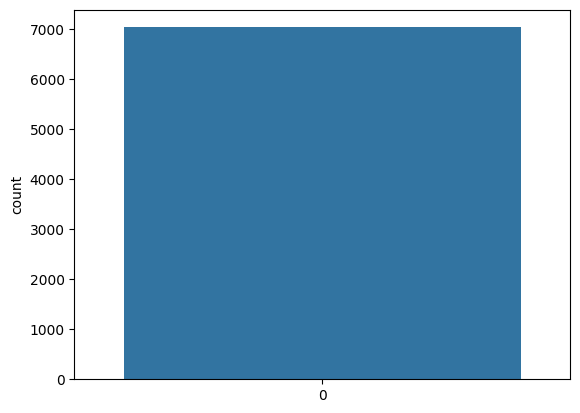

In [7]:
sns.countplot(dados.Churn)

In [8]:
dados.Churn.value_counts()

0    5174
1    1869
Name: Churn, dtype: int64

Claramente nossa variável dependente está desbalanceada... Isso é ruim, pois envieza a classificação do modelo de classificação modelado com os dados de treino. Isto é, como existem mais dados com a classificação 0 para o churn, o modelo pode aprender somente a prever corretamente somente os casos onde o churn é 0 e errar muito nos casos onde o churn é 1.


---



---




###3.2 - Balanceando os dados - Oversampling -SOMTE

Para realizar o balanceamento dos dados, utilizaremos uma técnica chamada de Oversampling, que consiste em realizar a criação de novas observações (dados) da classe que tem menos amostras, tendo como objetivo igualar a proporção entre as categorias. É importante salientar que Oversampling não é um método específico, mas sim um conjunto de tecnicas que seguem essa lógica geral, isto é, tecnicas que fazem a criação de novos dados artificiais para a classificação minoritária.

Vale salientar que, a criação de dados sintéticos com base nos dados que já existem ***NÃO FORNECE INFORMAÇÃO ADICIONAL AO MODELO***

A o método que vamos utilizar é o SMOTE.Sua ideia consiste em criar observações intermediárias entre os dados que estão próximos. Isto é, o método SMOTE vai selecionar aleatóriamente 2 elementos da classe minoritária, e sobre a linha de distância euclidiana entre esses 2 pontos, o SMOTE vai selecionar aleatóriamente um ponto sobre essa linha. Por exemplo, seja meu Y um campos de minutos, se minutos são 129.1 e 146.3 (que são dados reais), então será criada uma amostra de minutos com 137.7. Lembrando que não é necessariamente a média entre as amostras (o que seria o ponto que divide ao meio a reta de distância euclidiana entre os pontos).

Como cada elementos que vai ser gerado sintéticamente tem 39 nove campos, 1 campo da variável Y e 38 da variável X, ele vai rodar essa algoritmo de pegar um ponto entre dois pontos reais da classe minoritária para cada um dos 40 campos.

Antes de utilizar a classe SMOTE - Synthetic Minority Oversampling Technique - , devemos separar nossos dados em dados de variáveis independentes/explicativas/features X, dos dados de predição/dependentes/target Y:



In [9]:
x = dados.drop("Churn", axis = 1)#Devolve todo o dataset subtraido a coluna mandada pelo paramtro, que no caso eh Churn 
x

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,1,29.85,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.95,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,1,53.85,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,0,42.30,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,1,70.70,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,0,1,1,24,1,1,84.80,0,0,1,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
7039,0,1,1,72,1,1,103.20,0,0,1,0,1,0,1,0,0,0,0,1,0,0,1,1,0,0,0,0,1,0,0,1,0,0,1,1,0,0,0
7040,0,1,1,11,0,1,29.60,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
7041,1,1,0,4,1,1,74.40,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0


In [10]:
y = dados[["Churn"]]
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
7038,0
7039,0
7040,0
7041,1


Para utilizar a classe SMOTE devemos importar ela da biblioteca imblearn.over_sampling:

In [11]:
from imblearn.over_sampling import SMOTE

smt = SMOTE(random_state=123)  # Instancia um objeto da classe SMOTE, passamos um código de estado, para ganrantir que, toda vez que essa celula for rodada
                               # a classes SMOTE vai gerar os mesma dados sintéticos.
x, y = smt.fit_resample(x, y)  # o método fit_sample devolve dois datasets, x e y, e esses data set já tem as linhas sintéticas criadas conforme foi explicado anteriormente

In [12]:
x

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,1,29.850000,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.950000,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,1,53.850000,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,0,42.300000,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,1,70.700000,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,1,0,5,1,1,80.921075,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
10344,0,0,0,3,1,1,74.347278,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
10345,0,0,0,18,1,1,70.164647,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
10346,0,0,0,30,1,0,93.024726,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [13]:
y

,Churn
0,0
1,0
2,1
3,0
4,1
...,...
10343,1
10344,1
10345,1
10346,1


Note que, o número de elementos/linhas do nosso dataset foi de 7.043 para 10.348, ou seja forom criadas 3.305 novas linhas sintéticas pelo método SMOTE. Esse valor não é por acaso, o método SMOTE cria dados sintéticos da classe minoritária de tal forma que, ao final o número de elementos das duas classes se iguale! Ou seja, a diferença incial entre as classes era de 3.305!

In [14]:
dados.Churn.value_counts()[0] - dados.Churn.value_counts()[1]

3305

In [15]:
y.Churn.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

<Axes: ylabel='count'>

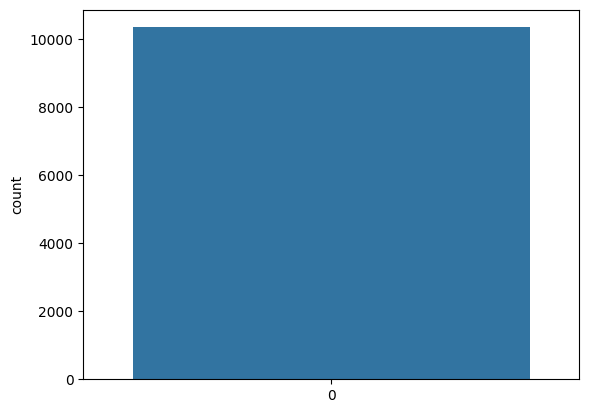

In [16]:
sns.countplot(y.Churn)

Veja que, os novos dados Y (e também o X) tem o mesmo número de elementos para ambas as classes. Agora precisamos concatenar os dados X e Y, que neste momento estão em dataset separados.

In [17]:
dados =pd.concat([x,y], axis=1)
dados

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta,Churn
0,0,1,0,1,0,1,29.850000,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,0,0,34,1,0,56.950000,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0,0
2,0,0,0,2,1,1,53.850000,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,1
3,0,0,0,45,0,0,42.300000,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1,0
4,0,0,0,2,1,1,70.700000,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,1,0,5,1,1,80.921075,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
10344,0,0,0,3,1,1,74.347278,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1
10345,0,0,0,18,1,1,70.164647,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1
10346,0,0,0,30,1,0,93.024726,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,1




---



---



---



#4 - Modelo KNN - k-nearest neighbors/K-vizinhos mais próximos

O KNN é um algoritmo de ML Supervisionado e pode ser usado tanto para classificação (o nosso caso) quando para Regressão. A lógica é extremamante simples...


  O algoritmo recebe os elementos já existentes do dataset e com eles em mãos, vai ficar no aguardo de novos elementos que desejamos classificar:

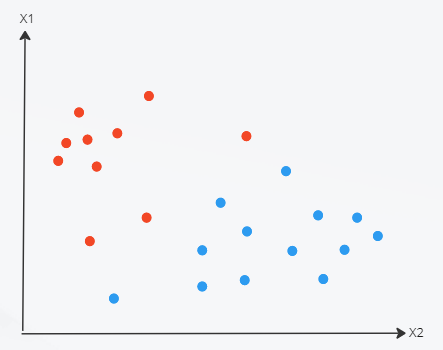

Aqui, os eixos X1 e X2 são as caracteristicas/features/variáveis independentes, e a cor dos pontos é a classificação de cada ponto dentro da variável dependente/tagert Y. Neste exemplo, o target Y é categórica booleana, onde os azuis representam alguma categoria e o vermelho a outra.

Em seguida o entra um novo elementos que, nosso modelo de KNN que classificar como sendo ou da classe azul ou vermelha:

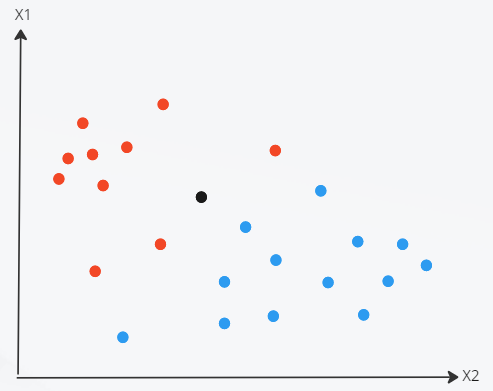

Logo em seguida passamos o parâmetro k, onde k é um número inteiro tal que 0 < K < Tamanho da população. 

Esse número K vai guiar o calculo de distâncias euclidianas do novo ponto (ponto preto) com os k elementos vizinhos mais próximos dele. Digamos que fizemos k = 1, logo teremos que:

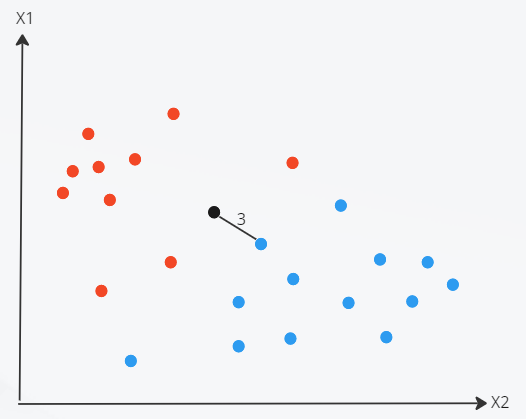

O algoritmo KNN nos retornou que o vizinho mais próximo é um azul e a distância entre eles é 3 unidades. Nesta configuração de K, onde k = 1, o algoritmo irá classificar esse novo elemento como sendo da classe azul.

Se k = 2 temos que:

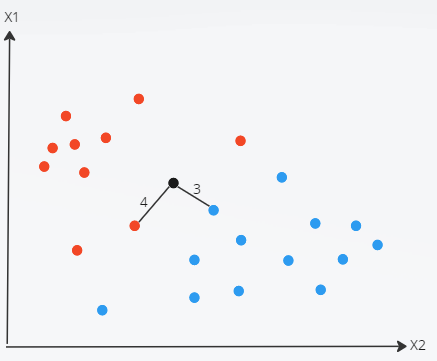

O segundo vizinho mais próximo é um vermelho com distância 4. Com essa configuração o algoritmo vai escolher a classe que tem a menor distância do novo ponto, ou seja, ele vai classificar o novo ponto como sendo azul.

Com k = 3 temos que:

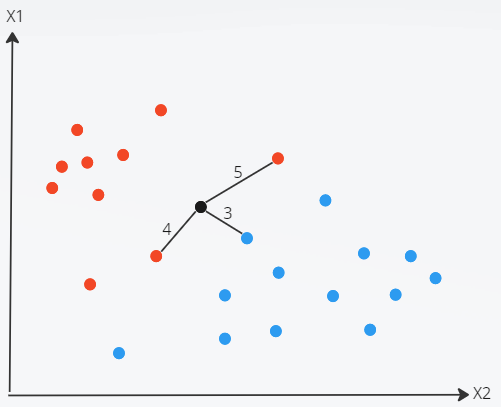

O terceiro vizinho mais próximo é um vermelho com distância 5 do ponto novo. Com essa nova configuração o algoritmo vai escolher a classificação que mais aparece na lista de k = 3 vizinhos mais próximo, ou seja, ele vai classificar o novo ponto como sendo vermelho, pois existem 2 vermelhos e 1 azul na lista de k = 3 mais próximos.

A lógica para k = n, onde n >3 é a mesma, o algoritmo calcula as distâncias do novo ponto com o n mais próximos, organiza de forma crescente essa lista de distâncias e vai classificar o novo ponto com a mesma classe que está em maior frequencia dentro da lista de distâncias. 

Caso de empate, ou seja, na lista de distâncias houver a mesma quantidade para ambas as classes, o algoritmo pega a classificação da classe que tem a menor distância.

Por exemplo, quand k = 6 temos:

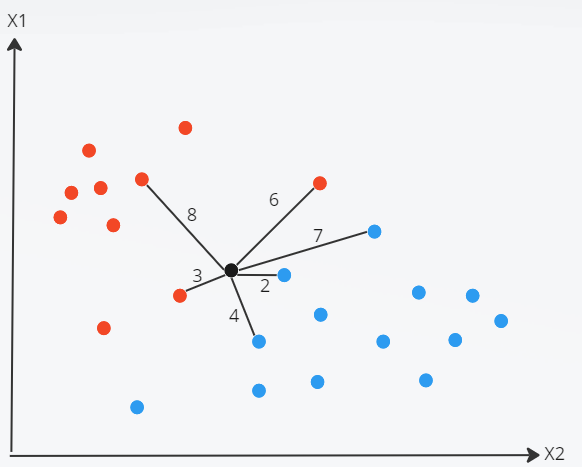

A lista de distâncias será: 

lista = [2A, 3V, 4A, 6V, 7A, 8V]

Neste caso, como há a mesma ferquência de classes dentro da lista (3 vermelhas e 3 azuis) o algoritmo pega aquele que apresenta as menores distâncias, que no caso é a Azul, logo o novo ponto é classificado como sendo azul.

##4.1 - Valor de K

Estudado a teoria sobre o algoritmo KNN, sempre vem a grende questão... qual será o valor de K perfeito para o qual temos um acrária máxima? Para responder isso vamos fazer suposições sobre o valor de K e vejamos os desdobramentos:

**Valor de K muito pequeno -> Overfitting (KNN)**

Overfitting é o quando nosso modelo apenas consegue fazer previsões com acurácia boa se os dados de entrada forem os próprios dados de treino ou que sejam semelhantes a estes. Ou seja, se os dados forem diferentes com o que ele treinou, ele vai errar.Em linguajar mais acadêmico, falamos que o modelo se ajustou muito aos dados de treino. Na maioria dos modelos de Machine Learning isso ocorre quando a quantidade de dados de treino é muito grande ou/e quando os dados de treino são muitos pareceidos entre sí, ou seja, a grande quantidade de dados de treino não refletiu em novas informações para o modelo.


 no caso do modelo KNN é o oposto! Isto é, o Overfitting é quando adicionamos poucos dados de treino. Mas a conseguencia é a mesma do Overfitting, isto é, o nosso modelo de KNN apenas vai conseguir fazer previsões corretas  se os dados forem semelhantes daqueles com que treinou.

**Valor de K muito grande --> Underfitting (KNN)**

Unerfitting, como o nome já sugere, é quando não damos a quantidade suficiente de dados de treino ao nosso modelo e acabamos por subtreinar nosso modelo. Isso acarreta em siatuações onde, o nosso modelo é tão mal ajustado que ele nem consegue fazer previsões corretas com os próprios dados de treino como entrada. Para dados não semelhantes aos de treino a acurácia é pior ainda! 

No caso do modelo KNN ocorre o Underfitting quando ocorre o oposto com os dados de treino! Isto é, quando adicionamos muitos dados ao modelo de KNN ocorre o Underfitting, pois nesse caso, a lista de distâncias dos K vizinhos mais próximos é tão grande, que, na hora que chaga um novo ponto para ser classificado, existem muitos vizinhos tanto de uma classe quanto da outra.

Por padrão usa-se k = 5, e é exatamente esse valor de k = 5, que o sklearn carrega caso não passemos esse parametro para ele. É claro que, podemos testar vários valores de k, pois não necessariamente para k = 5 teremos a maior acurácia para todos os casos.



---



---



##4.2 - Pré Requisitos - KNN

Assim como todo modelo de Machine Learning, o KNN funciona melhor em determinados cenários ideias, ou seja, fora deles, a acuária da previsão por KNN pode ser baixa. Sem mais de longas vamos a eles: 


***- Mesma Escala dos dados de treino***
  - O KNN foi modelado para ser usado em casos onde os dados de treino/features estão na mesma escala. Por esse motivo faz-se necessário aplicar tecnicas que padronizam as escalas das variáveis indepedentes, como:
    - Padronização: Ou seja, estamos falando da tecnica que diminui a escala da distribuição de cada variável X num intervalo menor, que pode ser maior que 1 e menor que 0. Estamos falando da tecnica de padronização Z! Ou seja de novo, padronizar uma variável independente deixará sua média igual a 0 e um desvio padrão igual a 1:
    

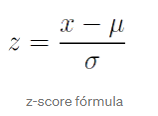

- Normalização: normalizar todos as variáveis Xs dentro do range [0,1] também é um alternativa bastabte utilizada! 

***- Dimensionalidade Baixa***
  -  o KNN é adequado para dados dimensionais baixos, isto é, para baixos número de variáveis explicativas Xs.  Você pode experimentá-lo em dados de alta dimensão (centenas ou milhares de variáveis ​​de entrada), mas esteja ciente de que ele pode não funcionar tão bem quanto outras técnicas.

***- Features quantitativas e qualitativas***
  - Isto não é um  pré requisito, na verdade é mais uma dica, avisando que as variáveis das features pode ser tanto do tipo qualitativas quanto quantitativas.



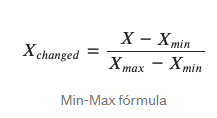

Como comentado, o algoritmo de KNN necessita que todos os dados de treino estejam numa mesma escala, isto pe, o KNN é muito sensível a variáveis explicativas X que tenham um escalas muito grandes

<ipython-input-18-e8e9a27ea4de>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados.MesesDeContrato)


<Axes: xlabel='MesesDeContrato', ylabel='Density'>

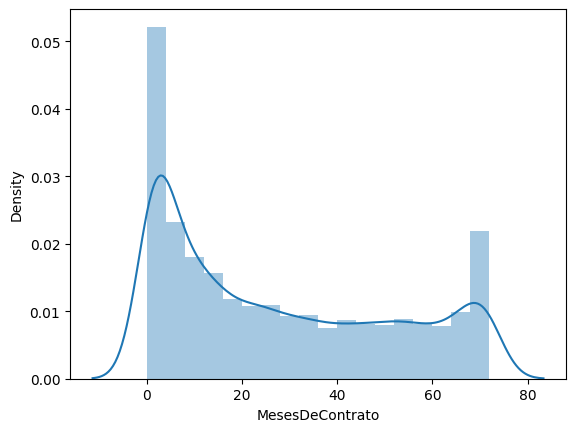

In [18]:
sns.distplot(dados.MesesDeContrato)

<ipython-input-19-a2af093a1f8c>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dados.ContaMensal)


<Axes: xlabel='ContaMensal', ylabel='Density'>

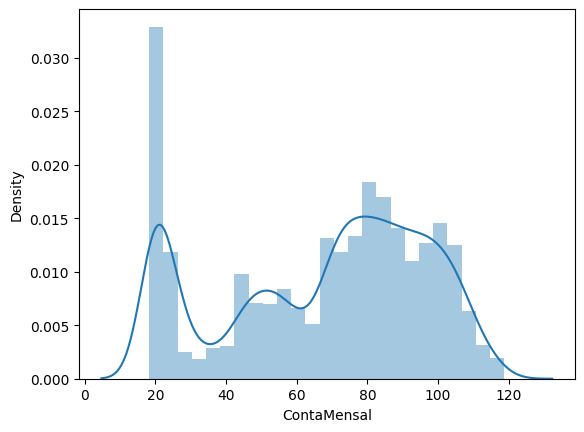

In [19]:
sns.distplot(dados.ContaMensal)

In [20]:
x

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,1,0,1,29.850000,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,0,34,1,0,56.950000,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,0,2,1,1,53.850000,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,45,0,0,42.300000,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,2,1,1,70.700000,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,1,0,5,1,1,80.921075,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
10344,0,0,0,3,1,1,74.347278,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
10345,0,0,0,18,1,1,70.164647,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
10346,0,0,0,30,1,0,93.024726,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


In [21]:
from sklearn.preprocessing import StandardScaler

padronizar  = StandardScaler()
x_padronizado = x
x_padronizado[["MesesDeContrato","ContaMensal"]] = padronizar.fit_transform(x_padronizado[["MesesDeContrato","ContaMensal"]])
x_padronizado

,Maior65Anos,Conjuge,Dependentes,MesesDeContrato,TelefoneFixo,PagamentoOnline,ContaMensal,VariasLinhasTelefonicas_Nao,VariasLinhasTelefonicas_SemServicoTelefonico,VariasLinhasTelefonicas_Sim,ServicoDeInternet_DSL,ServicoDeInternet_FibraOptica,ServicoDeInternet_Nao,SegurancaOnline_Nao,SegurancaOnline_SemServicoDeInternet,SegurancaOnline_Sim,BackupOnline_Nao,BackupOnline_SemServicoDeInternet,BackupOnline_Sim,SeguroNoDispositivo_Nao,SeguroNoDispositivo_SemServicoDeInternet,SeguroNoDispositivo_Sim,SuporteTecnico_Nao,SuporteTecnico_SemServicoDeInternet,SuporteTecnico_Sim,TVaCabo_Nao,TVaCabo_SemServicoDeInternet,TVaCabo_Sim,StreamingDeFilmes_Nao,StreamingDeFilmes_SemServicoDeInternet,StreamingDeFilmes_Sim,TipoDeContrato_DoisAnos,TipoDeContrato_Mensalmente,TipoDeContrato_UmAno,FormaDePagamento_CartaoDeCredito,FormaDePagamento_ChequeDigital,FormaDePagamento_ChequePapel,FormaDePagamento_DebitoEmConta
0,0,1,0,-1.107718,0,1,-1.321771,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
1,0,0,0,0.267207,1,0,-0.379580,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,0,1,0,0,1,0
2,0,0,0,-1.066054,1,1,-0.487358,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
3,0,0,0,0.725515,0,0,-0.888919,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,1
4,0,0,0,-1.066054,1,1,0.098469,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10343,0,1,0,-0.941061,1,1,0.453827,0,0,1,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
10344,0,0,0,-1.024389,1,1,0.225274,0,0,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0
10345,0,0,0,-0.399423,1,1,0.079856,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0
10346,0,0,0,0.100549,1,0,0.874637,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0


<ipython-input-22-028e5a0c15f6>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_padronizado.MesesDeContrato)


<Axes: xlabel='MesesDeContrato', ylabel='Density'>

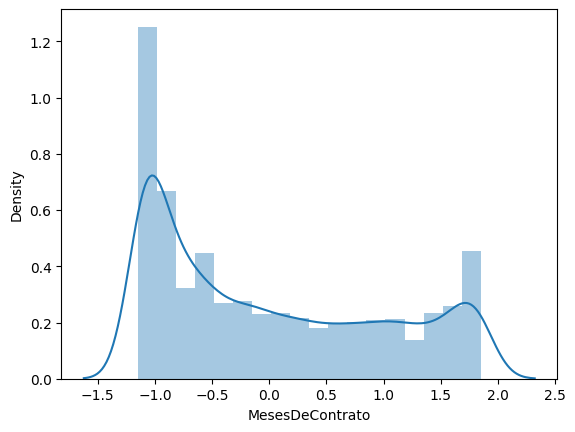

In [22]:
sns.distplot(x_padronizado.MesesDeContrato)

<ipython-input-23-4c55c86cbaea>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(x_padronizado.ContaMensal)


<Axes: xlabel='ContaMensal', ylabel='Density'>

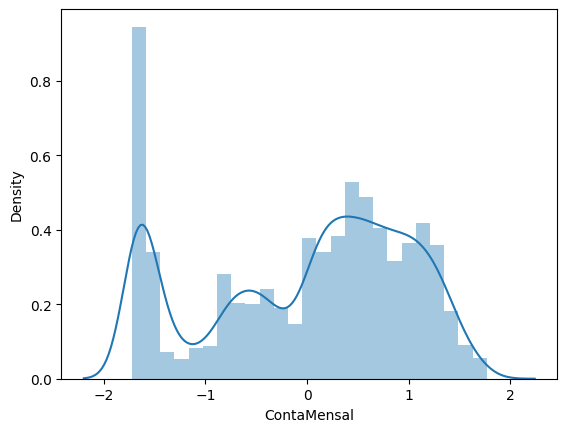

In [23]:
sns.distplot(x_padronizado.ContaMensal)

In [24]:
from sklearn.model_selection import train_test_split

SEED = 123
np.random.seed(SEED)

x_treino, x_teste, y_treino, y_teste = train_test_split(x_padronizado, y, test_size = 0.3)
x_treino.shape

(7243, 38)

In [25]:
x_teste.shape

(3105, 38)



---



---



##4.3 - Instanciando Modelo KNN e métrica de Distância

Agora que temos os dados padronizados e já separamos os dados para treino e teste, vamos de fato instanciar o nosso modelo de KNN com a biblioteca sklearn.neighbors, dela vamos importar a classe KNeighborsClassifier. Ela nos trás um modelo de KNN virgem/puro, no qual passamos a métrica de distância que ela vai usar para calcular a distância entre o novo ponto que queremos classificar e os pontos que nosso modelo já tem (dados de treino).

A métrica que vamos passar é a distância euclidiana. Nos ensinam a distância euclidiana na escola e ela é bem simples:
- ***Para planos 2d (2 variáveis explicativas/features***):

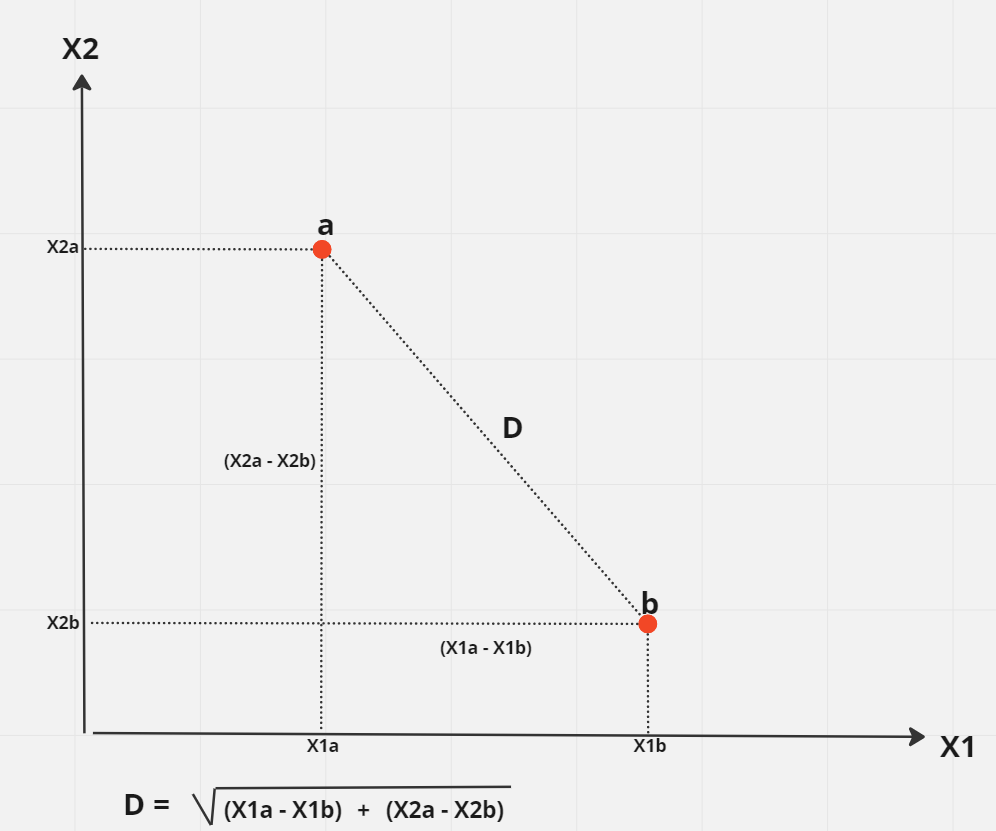

  - podemos ver que a distância D entre dois pontos no plano 2D é pode ser simplificado como sendo o cálculo da Hipotenusa do triangulo retangulo  de catetos (X1a - X1b) e (X2a -X2b).

- ***Para planos 3D temos a seguinte situação:***

Text(0.5, 0, 'X3')

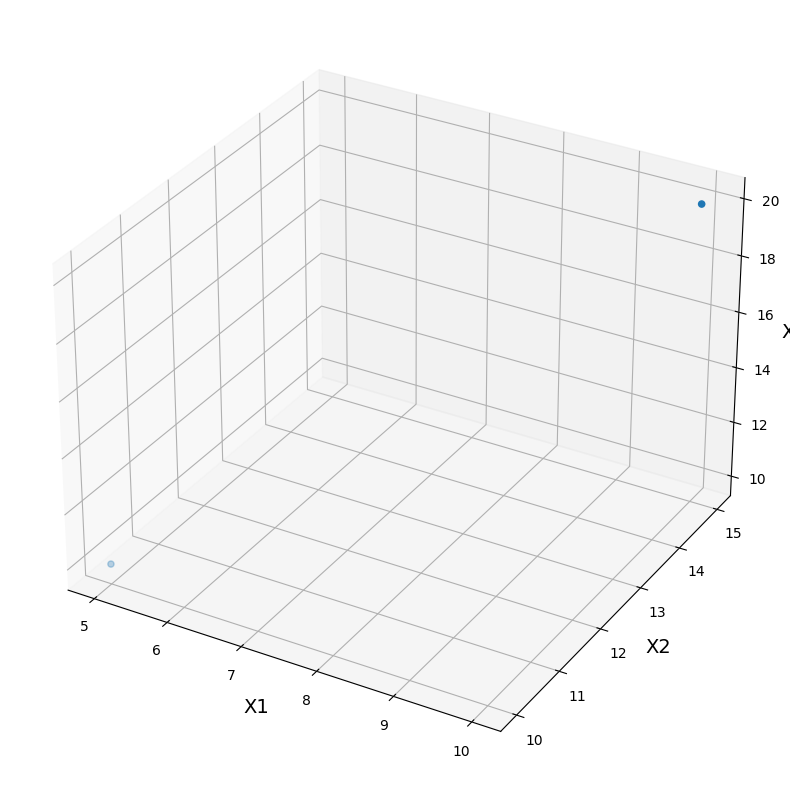

In [26]:
import matplotlib.pyplot as plt

x = [5, 10]
y = [10, 15]
z = [10, 20]

fig = plt.figure()
fig.set_size_inches(16,10)

grafico = fig.add_subplot(111, projection = "3d") 

grafico.scatter(x,y, z)
grafico.set_xlabel("X1", fontsize = 14)
grafico.set_ylabel("X2", fontsize = 14)
grafico.set_zlabel("X3", fontsize = 14)

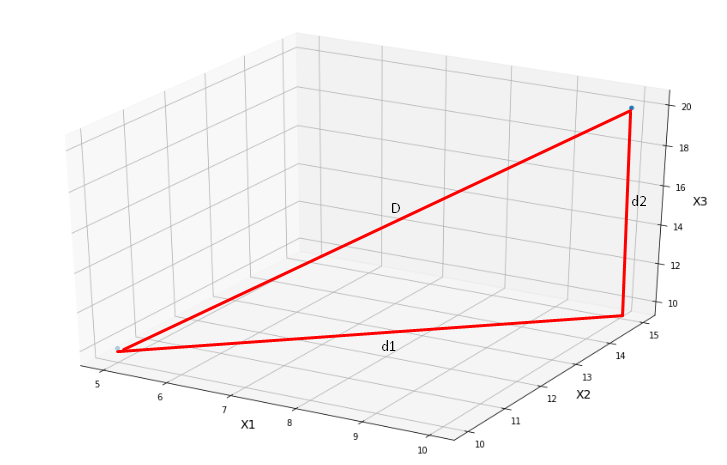

  - Podemos ver a distância D entre os dois pontos no espaço 3D é a Hipotenusa do triangulo retangulo de catetos d1 e d2. note que d1 também é a hipotenusa de catetos (X1a -X1b) e (X2a - X2b) e note que, d2 é a diferença do ponto a é b em ralação ao eixo X3, isto é, d2 = (X3a - X3b).
  - Logo podemos calcular D como sendo:

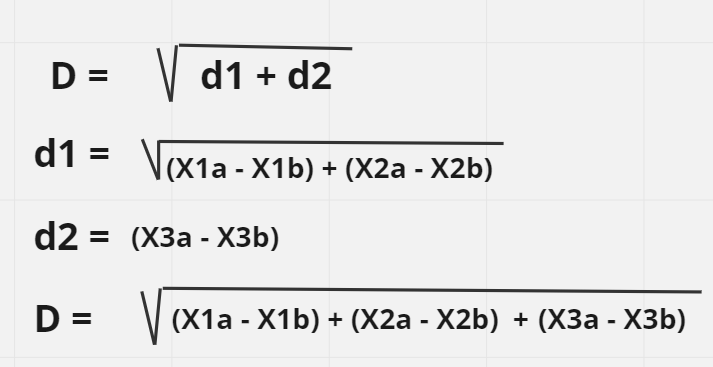

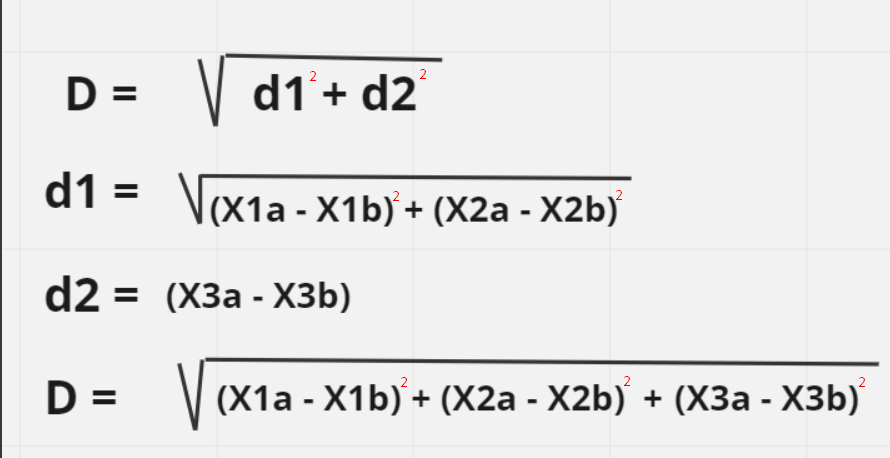

 - Disntancia euclidiana n Dimensões (mais de 3 fetures):
  - Para n, n > 3, dimensões a distância euclidiana pode ser calculada pela generalização que acabamos de descobrir, isto é, a distancia euclidiana entre dois pontos "a" e "b" é o somatória das diferenças entre as suas coordenadas X1, X2, X3, ..., Xn:  

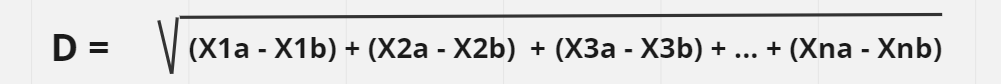

Para este nosso problema utilizaremos a distância euclidiana, mas podemos modificar a medida de distância utilizando o argumento metric da função sklearn.neighbors.KNeighborsClassifier podendo receber os seguintes valores:

“euclidean” para a distância euclidiana;
“manhattan” para a distância de Manhattan;
“minkowski” para a distância de Minkowski;
“chebyshev” para a distância de Chebyshev.

Você pode saber um pouco mais de cada distancia acessando o link sobre diferentes medidas de distância: https://colab.research.google.com/drive/15vA4nuXkiWp9c9yYgs13mnym-n0xDBIq

Vamos fazer um exemplo, vamos pegar uma linha (um ponto) de teste e calcular a distancia dele com outra linha (outro ponto):

In [27]:
x_padronizado.iloc[0]#Digamos que esse é um novo elementos que queremos classificar 

Maior65Anos                                     0.000000
Conjuge                                         1.000000
Dependentes                                     0.000000
MesesDeContrato                                -1.107718
TelefoneFixo                                    0.000000
PagamentoOnline                                 1.000000
ContaMensal                                    -1.321771
VariasLinhasTelefonicas_Nao                     0.000000
VariasLinhasTelefonicas_SemServicoTelefonico    1.000000
VariasLinhasTelefonicas_Sim                     0.000000
ServicoDeInternet_DSL                           1.000000
ServicoDeInternet_FibraOptica                   0.000000
ServicoDeInternet_Nao                           0.000000
SegurancaOnline_Nao                             1.000000
SegurancaOnline_SemServicoDeInternet            0.000000
SegurancaOnline_Sim                             0.000000
BackupOnline_Nao                                0.000000
BackupOnline_SemServicoDeIntern

In [28]:
x_padronizado.iloc[1]#Vamos calcular a distancia entre o ponto da celula anterior com este

Maior65Anos                                     0.000000
Conjuge                                         0.000000
Dependentes                                     0.000000
MesesDeContrato                                 0.267207
TelefoneFixo                                    1.000000
PagamentoOnline                                 0.000000
ContaMensal                                    -0.379580
VariasLinhasTelefonicas_Nao                     1.000000
VariasLinhasTelefonicas_SemServicoTelefonico    0.000000
VariasLinhasTelefonicas_Sim                     0.000000
ServicoDeInternet_DSL                           1.000000
ServicoDeInternet_FibraOptica                   0.000000
ServicoDeInternet_Nao                           0.000000
SegurancaOnline_Nao                             0.000000
SegurancaOnline_SemServicoDeInternet            0.000000
SegurancaOnline_Sim                             1.000000
BackupOnline_Nao                                1.000000
BackupOnline_SemServicoDeIntern

In [29]:
x_padronizado.iloc[0] - x_padronizado.iloc[1]#Calculando a diferença entre elas em relação a cada feature 

Maior65Anos                                     0.000000
Conjuge                                         1.000000
Dependentes                                     0.000000
MesesDeContrato                                -1.374925
TelefoneFixo                                   -1.000000
PagamentoOnline                                 1.000000
ContaMensal                                    -0.942191
VariasLinhasTelefonicas_Nao                    -1.000000
VariasLinhasTelefonicas_SemServicoTelefonico    1.000000
VariasLinhasTelefonicas_Sim                     0.000000
ServicoDeInternet_DSL                           0.000000
ServicoDeInternet_FibraOptica                   0.000000
ServicoDeInternet_Nao                           0.000000
SegurancaOnline_Nao                             1.000000
SegurancaOnline_SemServicoDeInternet            0.000000
SegurancaOnline_Sim                            -1.000000
BackupOnline_Nao                               -1.000000
BackupOnline_SemServicoDeIntern

In [30]:
(x_padronizado.iloc[0] - x_padronizado.iloc[1])**2#elevando cada diferença ao quadrado

Maior65Anos                                     0.000000
Conjuge                                         1.000000
Dependentes                                     0.000000
MesesDeContrato                                 1.890419
TelefoneFixo                                    1.000000
PagamentoOnline                                 1.000000
ContaMensal                                     0.887723
VariasLinhasTelefonicas_Nao                     1.000000
VariasLinhasTelefonicas_SemServicoTelefonico    1.000000
VariasLinhasTelefonicas_Sim                     0.000000
ServicoDeInternet_DSL                           0.000000
ServicoDeInternet_FibraOptica                   0.000000
ServicoDeInternet_Nao                           0.000000
SegurancaOnline_Nao                             1.000000
SegurancaOnline_SemServicoDeInternet            0.000000
SegurancaOnline_Sim                             1.000000
BackupOnline_Nao                                1.000000
BackupOnline_SemServicoDeIntern

In [31]:
np.sum((x_padronizado.iloc[0] - x_padronizado.iloc[1])**2)# A soma da diferença das features

17.77814221943915

In [32]:
np.sqrt(np.sum((x_padronizado.iloc[0] - x_padronizado.iloc[1])**2))

4.216413430801011

Temos que a distância euclidiana num espaço 38 Dimensional é de 4,216 unidades! 


É isso que o KNN faz para cada um dos K vizinhos mais próximos. Sem mais de longas vamos importar o modelo:

In [33]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(metric = "euclidean")
knn.fit(x_treino, y_treino)
previsoes_knn = knn.predict(x_teste)
previsoes_knn

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


array([1, 0, 0, ..., 0, 1, 1])

Por padrão, a classe KNeighborsClassifier usa K = 5, ou seja, a lista que nosso algoritmo vai usar de comparação para classificar os dados terá os 5 vizinhos mais próximos do novo dado que queremos classificar.

<Axes: >

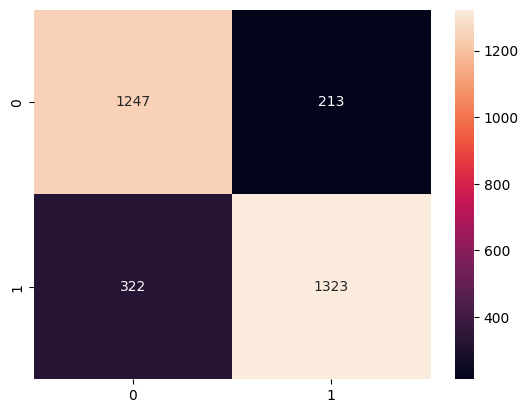

In [34]:
from sklearn.metrics import accuracy_score, confusion_matrix

sns.heatmap(confusion_matrix(previsoes_knn, y_teste), annot = True, fmt="d")

In [35]:
print("Acurácia do modelo KNN : %.2f%%" % (accuracy_score(y_teste, previsoes_knn)*100) ) 

Acurácia do modelo KNN : 82.77%
